## <center><font color=navy>Algorithmic Trading with Python</font></center>
### <center>Introduction to Algorithmic Trading</center>
#### <center>Ali Habibnia</center>

***
<h2 align="center"style="color: black;"> Designing an algorithmic trading system </h2>


Designing an algorithmic trading system involves a series of interconnected steps. Here are the primary stages in the process:

1. **Market and Trading Basics**: This involves understanding the market and trading fundamentals. Familiarize yourself with financial instruments (stocks, bonds, Cryptocurrencies, options, futures, etc.), different market types, and trading concepts. Understanding the fundamental and macroeconomic factors affecting markets is also crucial.

2. **Choose a Trading Strategy**: Decide on the trading strategy you wish to automate. Common strategies include mean reversion, momentum, statistical arbitrage, and pairs trading, High-Frequency Trading (HFT), among others. The chosen strategy should align with your trading goals, risk tolerance, and available capital.

3. **Data Collection**: Acquire historical and real-time data for backtesting and live trading respectively. Data could include price, volume, fundamentals, or even alternative data like social media sentiment and limit order book data.

4. **Formulate a Trading Algorithm**: Using the selected strategy, formulate a trading algorithm. This should detail the specific conditions under which trades will be made. In other words, it should specify the entry and exit points, position sizing, and risk management measures.

5. **Backtesting**: Use historical data to test your algorithm. Backtesting helps you gauge the performance of your strategy before live deployment. While doing this, be wary of pitfalls like overfitting, where a model performs well on historical data but fails in a live market scenario. There are some advanced backtesting methods to find more robust strategies.

6. **Evaluation**: Evaluate the performance of the algorithm using various metrics such as the Sharpe ratio, drawdown, return on investment, etc. This will help you understand the risk and reward tradeoff of the strategy.

7. **Paper Trading**: This is a form of pseudo live testing where the algorithm runs on real-time market data, making hypothetical trades (not real money trades) to validate the performance in current market conditions.

8. **Live Trading**: If your strategy performs well during backtesting and paper trading, you can proceed to live trading. This involves real money and actual execution of trades.

9. **Performance Monitoring and Tweaking**: Constantly monitor your algorithm's performance during live trading. Market conditions change, and an algorithm might need adjustments or even a complete reworking.

10. **Risk Management**: Throughout all these steps, it's important to keep risk management in mind. Set stop-loss points, manage leverage wisely, and diversify your portfolio to protect against adverse market conditions.

Remember, the most critical part of an algorithmic trading system is not just the trading strategy, but also the robustness of the system, the risk management, and its ability to adapt to changing market conditions.

---

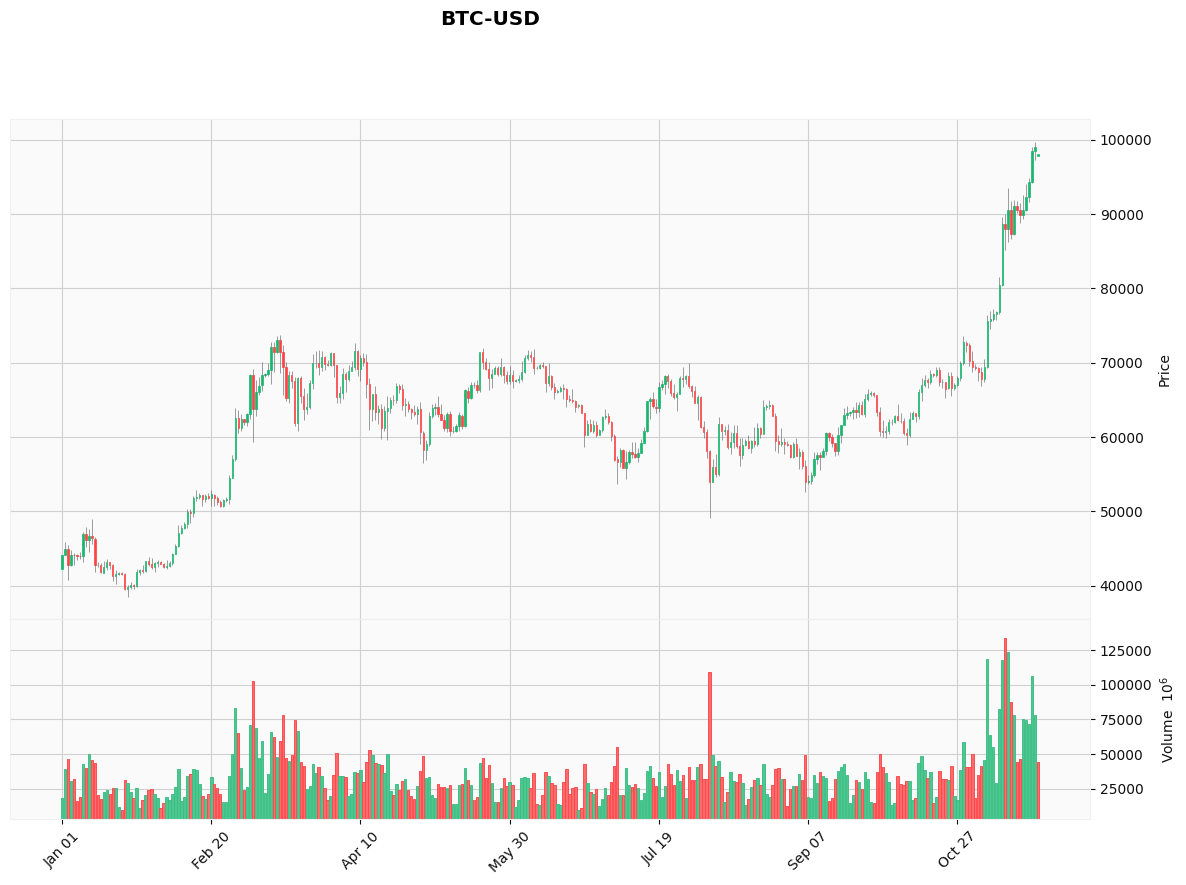

In [46]:
import yfinance as yf
import mplfinance as mpf
import datetime as dt
import pandas_ta as ta

start_date = dt.datetime(2024, 1, 1)
end_date = dt.datetime.now()
stock_symbol = "BTC-USD"
BTCUSD = yf.Ticker(stock_symbol)
data = BTCUSD.history(start=start_date, end=end_date)
#data = yf.download(stock_symbol, start=start_date, end=end_date)

mpf.plot(data, type='candle', style='yahoo', title=f"{stock_symbol}", volume=True, figsize=(15,10))

***

<h2 align="center"style="color: black;"> Key Variables in Finance </h2>


### 1. **Price**  
Price is the most fundamental variable in finance, referring to the amount at which a security (such as stocks, bonds, or commodities) is traded between buyers and sellers. Price is primarily determined by the forces of demand and supply: when demand for an asset exceeds supply, prices rise, and when supply exceeds demand, prices fall. Price is publicly available data on most trading platforms and forms the basis of technical analysis and predictive models. Traders use price data to analyze historical trends and forecast future movements. This can be done through technical analysis (chart patterns) or machine learning models that predict future prices based on historical patterns and other factors.

### 2. **Volume**  
Volume represents the total number of shares or contracts traded for a security within a specific time frame. Like price, volume is also publicly available trading data. Volume provides insights into market activity and is commonly used to confirm trends or signals in price movements. High volume during a price increase may indicate a strong upward trend, while low volume can signal a weak trend or potential reversal.

### 3. **Returns**  
Returns represent the percentage change in the price of an asset over time. In finance, returns are often preferred over absolute prices in modeling because returns normalize price movements, making them easier to compare across assets or time periods. Price data is typically non-stationary, meaning its statistical properties like mean and variance change over time. To address this issue, financial models often use returns, which tend to be more stationary and exhibit more stable statistical properties. Modeling returns also makes it easier to capture key aspects of asset performance, such as risk and expected reward, in a more robust manner.

>Here are some articles that survey stylized facts of asset return (daily & univariate).
>- [Cont, Rama (2001) "Empirical properties of asset returns: stylized facts and statistical issues," Qunatitative Finance, 1, 223-236.](http://rama.cont.perso.math.cnrs.fr/pdf/empirical.pdf)
>- [Rydberg, T. (2005) "Realistic Statistical Modeling of Financial Data," Technical Report, Nuffield College, Oxford, UK.](http://www-stat.wharton.upenn.edu/~steele/Resources/FTSResources/StylizedFacts/Rydberg.pdf)
>- [Malmsten, H., & Teräsvirta, T. (2010). Stylized facts of financial time series and three popular models of volatility. European Journal of pure and applied mathematics, 3(3), 443-477.](http://www-stat.wharton.upenn.edu/~steele/Resources/FTSResources/StylizedFacts/MalmstenTerasvirta04.pdf)


#### Stylized facts for daily asset returns: Taxonomy

Link to the notebook demonstrating the stylized fact of asset returns:  
[Stylized Facts of Asset Returns Notebook](https://github.com/AliHabibnia/CMDA_4984_Data_Science_for_Quantitative_Finance/blob/main/Lecture%2002_Stylized%20Facts%20of%20Asset%20Returns.ipynb)


For daily data we observe the following stylized facts:

* Andreou, Pittis and Spanos (2001)
    - distribution
    - dependence
    - heterogeneity
    
* Challet, Marsili and Zhang (2001)
    - volatility and volume clustering
    - return and volume histograms
    
* Cont (2001)
    
    - absence of autocorrelations
    
    -heavy tails
    
    -gain/loss asymmetry
    
    -aggregational Gaussianity
    
    -intermittency
    
    -volatility clustering
    
    -conditional heavy tails
    
    -slow decay of autocorrelation in absolute returns
    
    -leverage effect
    
    -volume/volatility correlation
    
    -asymmetry in time scales

* Johnson, Jefferies and Hui (2003)
    - fat-tailed PDF of price-changes, with non-trivial scaling properties
    - slow decay of the autocorrelation of absolute value of price-changes
    - volatility clustering
    - fast decay of the autocorrelation of price-changes
    
* Taylor (2005)

    - the distribution of returns is not normal
    - there is almost no correlation between returns for different days
    - the correlations between the magnitudes of returns on nearby days are positive and statistically significant
    
* Zivot (2016)

    - Prices appear to be random walk non-stationary and returns appear to be mostly covariance stationary. There is evidence that return volatility changes over time.
    - Returns are not normally distributed. Empirical distributions have much fatter tails than the normal distribution (excess kurtosis).
    - Assets that have high average returns tend to have high standard deviations (volatilities) and vice-versa. This is the no free lunch principle.
    - Returns on individual assets (stocks) have higher standard deviations than returns on diversified portfolios of assets (stocks).
    - Returns are approximately uncorrelated over time. That is, there is little evidence of linear time dependence in asset returns.
    - Returns are not independent over time. Absolute and squared returns are positively auto correlated and the correlation dies out very slowly. Volatility appears to be auto correlated and, hence, predictable.

<blockquote style="background-color:#e6f7ff; padding: 15px; border-left: 5px solid #1e90ff;">
Machine learning is particularly well-suited for modeling financial data due to the ability to handle complex patterns and capture the stylized facts observed in daily asset returns. Additionally, in cases where there are many predictors or when we consider the comovement between asset returns, machine learning models are effective at handling high dimensionality.
</blockquote>



### 4. **Volatility**  
Volatility measures the degree of price variation over time. High volatility indicates large swings in price, while low volatility suggests more stability. Volatility is crucial for assessing risk and pricing derivatives like options and futures. Traders use volatility to evaluate the uncertainty in price movements and to set up strategies like volatility arbitrage, which profits from differences between implied and realized volatility. Volatility can also vary over time, leading to the use of models (such as GARCH) to capture these dynamic changes.

### 5. **Bid-Ask Spread**  
The bid-ask spread is the difference between the highest price a buyer is willing to pay and the lowest price a seller is willing to accept for an asset. Traders, especially market makers and high-frequency traders, focus on narrowing the spread to capture price inefficiencies. A larger spread may indicate less liquidity or higher risk in the market.

### 6. **Limit Order Book (LOB) Data**  
LOB data provides a detailed view of the market by showing all outstanding limit orders, both bids and asks, at different price levels. Unlike the bid-ask spread, which reflects only the best available prices, LOB data reveals the depth of the market, displaying the number of shares or contracts available at various price points. Traders use LOB data to understand the full supply and demand dynamics in the market and to anticipate potential price movements based on the order flow.

### 7. **Macroeconomic Leading Indicators**  
Macroeconomic leading indicators are economic data points that help predict future economic performance. These indicators are critical for traders who anticipate the effects of economic shifts on financial markets. Examples include **interest rates**, which influence borrowing costs and economic growth, and **inflation rates**, which reflect the cost of goods and services over time. Other examples include **unemployment claims**, which indicate labor market strength, and **consumer confidence indexes**, which gauge the optimism of consumers regarding economic conditions. Traders use these indicators to forecast market trends and adjust their strategies accordingly.

### 8. **Financial Indicators**  
Financial indicators are metrics used to assess the financial health of a company or the overall market. These indicators are commonly used by traders to evaluate company performance or assess market risk. **Liquidity ratios**, such as the current ratio or quick ratio, measure a company's ability to meet its short-term obligations. **Leverage ratios**, such as the debt-to-equity ratio, assess a company's financial structure and risk level. **Profitability ratios**, such as return on assets (ROA) or return on equity (ROE), measure how efficiently a company generates profits relative to its assets or shareholders' equity. Traders use these financial indicators to make informed decisions on investments and assess market conditions.


### 9. **Alternative Data**

In addition to traditional data such as price, volume, and LOB, algorithmic traders increasingly use **alternative data** to enhance predictive models and gain an edge in the markets. Alternative data sources are often non-traditional and come from various unique datasets. Some examples include:

- **Textual Data**: Collected from news articles, social media posts, and earnings reports. This data is analyzed using natural language processing (NLP) techniques to gauge market sentiment or predict potential market-moving events.
  
- **Satellite Imagery**: Used to monitor industrial activity, track traffic to retail locations, or estimate agricultural yields. For example, traders might use satellite data to predict supply chain disruptions.

- **Web Scraping**: Involves collecting data from websites, such as product prices, reviews, or job postings. This data can be used to assess business activity or competitive positioning in an industry.

- **Google Trends**: Reflects global search behavior, providing insight into consumer interest or demand for certain products or services. Traders use this data to anticipate changes in market trends.

- **Sensor Data**: Data from IoT (Internet of Things) devices, such as environmental sensors or vehicle tracking systems, to assess real-time economic activity or supply chain efficiency.

- **Credit Card and Transaction Data**: Provides insights into consumer spending behavior. Traders use this data to gauge economic conditions and predict revenue performance for retail companies.

Incorporating alternative data into algorithmic trading strategies allows traders to capture unique market insights that are not available from traditional financial datasets, enabling more informed and innovative decision-making.

---


<h2 align="center"style="color: black;"> Schools of Thought in Financial Modeling </h2>

Financial modeling, a key component of both academic research and practical applications in finance, can generally be categorized into two main approaches. These schools of thought reflect different philosophies on how markets operate and how financial variables should be modeled and predicted.

### 1. **Mathematical Modeling**
Mathematical modeling in finance relies heavily on concepts from stochastic calculus and simulation techniques. This approach is grounded in the idea that financial markets are inherently random, and future price movements cannot be predicted with certainty based on historical data. The mathematical models often focus on creating frameworks to represent the evolution of asset prices over time, typically assuming that prices follow a stochastic process, such as a Brownian motion or geometric Brownian motion.

A classic example of this approach is the Black-Scholes model for option pricing, which uses stochastic differential equations to model the dynamics of asset prices and derive a closed-form solution for the price of options. In this school of thought, the focus is on risk management and derivative pricing, often under the assumption that markets are efficient and any available information is already reflected in current prices. As such, it posits that trying to predict future price movements from historical data alone is futile, as the market is not predictable in a deterministic way.


#### Simulating Asset Prices Using a Stochastic Approach

One popular method for simulating asset prices in financial modeling is the **Geometric Brownian Motion (GBM)** model. This model assumes that asset prices follow a continuous-time stochastic process, where the change in asset prices is driven by both a deterministic trend (drift) and a random component (volatility).

The formula for the Geometric Brownian Motion is:

$$
dS_t = \mu S_t dt + \sigma S_t dW_t
$$

Where:
- $S_t$ is the asset price at time $t$,
- $\mu$ is the drift rate (expected return),
- $\sigma$ is the volatility of the asset,
- $dW_t$ is a Wiener process (random shock).

Below is an example using Python to simulate asset prices based on the GBM model. The simulation starts with an initial asset price, applies a drift (expected return), and adds randomness (volatility) to simulate the asset's evolution over time.

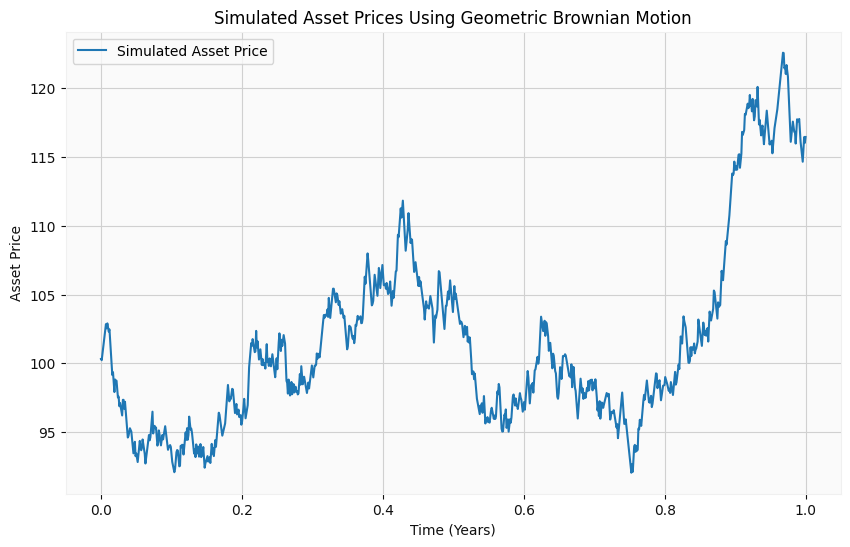

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the GBM model
S0 = 100  # initial asset price
mu = 0.05  # drift (expected return)
sigma = 0.2  # volatility
T = 1.0  # time horizon (in years)
N = 1000  # number of time steps
dt = T / N  # time step
np.random.seed(42)  # for reproducibility

# Simulating the asset price paths
t = np.linspace(0, T, N)
W = np.random.standard_normal(size=N)  # Wiener process increments
W = np.cumsum(W) * np.sqrt(dt)  # cumulative sum to simulate the random walk
S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)  # GBM formula

# Plotting the simulated asset price path
plt.figure(figsize=(10, 6))
plt.plot(t, S, label="Simulated Asset Price")
plt.title('Simulated Asset Prices Using Geometric Brownian Motion')
plt.xlabel('Time (Years)')
plt.ylabel('Asset Price')
plt.grid(True)
plt.legend()
plt.show()

- **Initial asset price ($S_0$)**: We start with an initial price of 100.
- **Drift ($\mu$)**: The expected return is set to 5% per year.
- **Volatility ($\sigma$)**: We assume a volatility of 20%.
- **Time horizon**: We simulate the asset price over 1 year.
- **Time steps ($N$)**: The time horizon is divided into 1000 small time steps to capture the stochastic process.
- The Wiener process ($W_t$) is generated by sampling random shocks and taking the cumulative sum.
- The GBM model is then applied to calculate the asset price at each time step.
- Finally, the simulated asset price is plotted over time.

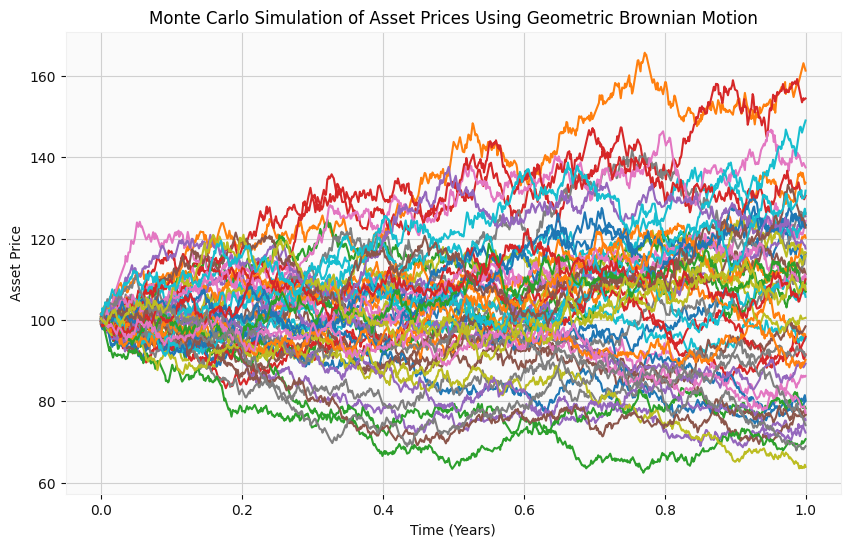

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the GBM model
S0 = 100  # initial asset price
mu = 0.05  # drift (expected return)
sigma = 0.2  # volatility
T = 1.0  # time horizon (in years)
N = 1000  # number of time steps
M = 50  # number of simulations
dt = T / N  # time step
np.random.seed(42)  # for reproducibility

# Simulating M paths of the asset price
t = np.linspace(0, T, N)  # time array
S = np.zeros((M, N))  # matrix to store asset prices
S[:, 0] = S0  # initial price for all simulations

# Simulate each path using the GBM model
for i in range(M):
    W = np.random.standard_normal(size=N)  # Wiener process increments
    W = np.cumsum(W) * np.sqrt(dt)  # cumulative sum for Wiener process
    S[i, :] = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)  # GBM formula

# Plotting the Monte Carlo simulated asset price paths
plt.figure(figsize=(10, 6))
for i in range(M):
    plt.plot(t, S[i, :], lw=1.5)
plt.title('Monte Carlo Simulation of Asset Prices Using Geometric Brownian Motion')
plt.xlabel('Time (Years)')
plt.ylabel('Asset Price')
plt.grid(True)
plt.show()

Price Path Interpretation:

- Each line represents a possible price path for the asset over time based on the given model. Since these paths incorporate random variations (due to volatility and the Wiener process), the lines spread out as time progresses, showing a range of potential future prices.
- If many lines converge or cluster around a specific price range, it suggests that, based on the model assumptions, the asset price is more likely to end up in that range.
- The spread between the highest and lowest simulated paths gives traders an idea of the range of possible outcomes. A wide range means the asset's future price is highly uncertain, while a narrow range suggests more confidence in the price projection.
- If many of the paths show a sharp drop in the asset price, this signals a potential downside risk, which traders might want to hedge against.
- Traders often look at the average of all simulated paths (i.e., the expected value of the asset price) to make decisions. The average path can indicate the most likely future price under the assumptions of the model. Some models also provide confidence intervals (e.g., 95% confidence) for the price, helping traders make decisions with certain probabilities in mind.


### 2. **Statistical and Data-Driven Modeling**
The second school of thought in financial modeling is statistical or data-driven modeling, which relies on historical data and statistical techniques to model and predict financial variables. Unlike the mathematical modeling approach, this school assumes that there are patterns or relationships in historical data that can be exploited to forecast future market behavior. This is where machine learning and other advanced statistical methods come into play.

The foundation of this approach is often based on the Efficient Market Hypothesis (EMH). EMH suggests that, while markets reflect all available information, they may not always be perfectly efficient. In weak forms of market efficiency, past prices and volume data are assumed to hold some predictive power, allowing traders and analysts to identify trends or anomalies that can lead to profits. Thus, statistical models assume that financial markets can be partially predictable, and this predictability can be extracted by using techniques such as regression models, time series analysis, and machine learning algorithms.

These models include techniques like autoregressive models (AR), generalized autoregressive conditional heteroskedasticity (GARCH) models, and neural networks that capture the nonlinearities and dependencies in the data. Data-driven approaches also make use of alternative data (e.g., textual data, satellite imagery) and can handle large-scale data with high dimensionality to make predictions about future market trends and risk factors.

#### Example: Using Comovement Between Assets for Trading

- Comovement refers to how different assets move in relation to one another. When assets are correlated, they tend to move in the same direction (positive correlation) or in opposite directions (negative correlation).

- Statistical dependency measures the relationship between two variables. Common methods to quantify dependency include correlation, covariance, and more advanced measures such as copulas for non-linear dependencies.

- Importance for Trading: Understanding comovement is crucial for strategies like portfolio diversification (to reduce risk) or pairs trading (to profit from discrepancies between highly correlated assets).

[*********************100%***********************]  3 of 3 completed


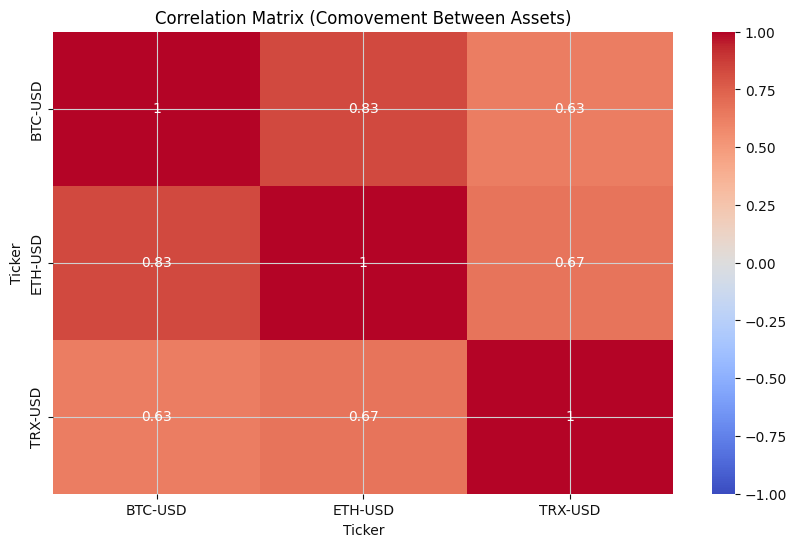

<Axes: xlabel='Date'>

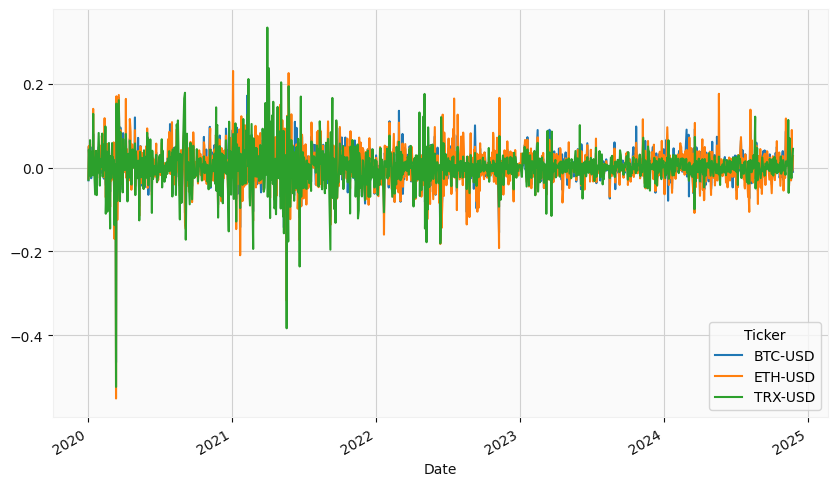

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

tickers = ['BTC-USD', 'ETH-USD', 'TRX-USD']

data = yf.download(tickers, start='2020-01-01', end=dt.datetime.now())['Adj Close']

returns = np.log(data / data.shift(1)).dropna()

if isinstance(returns.columns, pd.MultiIndex):
    returns.columns = returns.columns.get_level_values(0)
correlation_matrix = returns.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix (Comovement Between Assets)')
plt.show()

returns.plot(figsize=(10, 6))


### Statistical Dependency and its Role in Trading

**Correlation as a Measure of Dependency**:
Correlation is a simple and common method for quantifying comovement between assets by measuring their linear relationship. However, it has limitations:
- **Linear Assumption**: Correlation only captures linear relationships, so non-linear dependencies may not be fully reflected.
- **Static**: Correlation assumes relationships between assets remain constant over time, which is not always true, especially during market crises or changing conditions.

**Beyond Correlation: More Advanced Measures**:
- **Covariance**: Focuses on absolute movements between assets, but it lacks normalization, unlike correlation.
- **Copulas**: Useful for capturing **tail dependencies**, where extreme movements in one asset affect others, particularly under market stress.
- **Cointegration**: This method detects long-term equilibrium relationships between non-stationary assets, even when their short-term movements may diverge. It is particularly useful in pairs trading and other arbitrage strategies.

**Importance of Choosing the Right Method**:
Understanding comovement is crucial for strategies like **pairs trading** and **portfolio diversification**. Simple correlation might miss important signals, especially in non-linear or time-varying relationships. More robust measures, such as **copulas**, **cointegration**, and **dynamic conditional correlation (DCC)** models, are essential for capturing complex dependencies accurately.

**Challenges in Statistical Dependency**:
- **Non-Linearity**: Many asset relationships are non-linear, making correlation an inadequate measure in such cases.
- **Time-Varying**: Correlations can shift, especially during periods of high volatility or crises, sometimes referred to as “correlation breakdown.”
- **Tail Dependencies**: In extreme market events, normally uncorrelated assets may suddenly move together, revealing hidden dependencies.


Comovement plays a vital role in trading and risk management. While correlation is a widely-used metric, its limitations make more advanced methods necessary when dealing with non-linear or time-varying dependencies. Approaches like **copulas** (for tail dependencies), **cointegration**, and **DCC models** are essential for more accurate insights in trading strategies such as pairs trading and portfolio optimization.

For more details, refer to the following resources:
1. [Lecture 07: Introduction to Statistical Dependence and Copulas for Finance](https://github.com/AliHabibnia/CMDA_4984_Data_Science_for_Quantitative_Finance/blob/main/Lecture%2007_Introduction%20to%20Statistical%20Dependence%20and%20Copulas%20for%20Finance.ipynb)
2. [Temporal Evolution of Financial Market Correlations](https://arxiv.org/pdf/1011.3225)
3. [Essays in High-Dimensional Nonlinear Time Series Analysis](https://etheses.lse.ac.uk/3485/)


<blockquote style="background-color:#e6f7ff; padding: 15px; border-left: 5px solid #1e90ff;">

### Note on Model Assumptions
Regardless of whether you're using mathematical or statistical approaches in financial modeling, it is essential to recognize that all models and methods rely on key assumptions. These assumptions are foundational to the models’ functionality, and ignoring or misunderstanding them can lead to significant errors in interpretation and decision-making.

In mathematical models (such as those based on stochastic calculus), assumptions about market efficiency, randomness, and the behavior of prices (e.g., the Geometric Brownian Motion for asset prices) are critical. These models often assume that markets are efficient and follow a particular stochastic process, where prices are not predictable from past data. For instance, they typically assume constant drift and volatility, and that random shocks (represented by a Wiener process) are normally distributed.

In statistical and data-driven models, assumptions often center around the data itself, such as the stationarity of returns, the distribution of error terms, and the relationship between variables. These models may assume weak forms of market efficiency, where some historical data can help predict future price movements, but often rely on the assumption that market inefficiencies are small and short-lived.
</blockquote>

***
<h2 align="center"style="color: black;"> Types of Investors and Their Trading Approaches </h2>


In financial markets, investors and traders come in various forms, each with different objectives and strategies. Before delving into the specific approaches used in the market, it is essential to recognize the **different types of investors** who drive market activity. Below are examples of well-known companies for each investor category and the common methods or algorithms they use for trading.


### Types of Investors:

1. **Institutional Investors**:
   - **Examples**:
     - BlackRock, Vanguard Group, Fidelity Investments.
   - **Objective**: Maximize returns for large funds, such as pension funds, mutual funds, or insurance companies.
   - **Strategy**: These investors often employ diversified, long-term strategies focused on minimizing risk and achieving steady returns. They use a combination of fundamental analysis, quantitative models, portfolio optimization, and some machine learning for risk management.   
   
> [BlackRock AI Labs](https://www.blackrock.com/corporate/ai)

> [Man Institute](https://www.man.com/maninstitute)

2. **Retail Investors**:
   - **Examples**:
     - Robinhood, E*TRADE, Wealthfront (robo-advisor), Betterment (robo-advisor).
   - **Objective**: Individual investors seeking to grow personal wealth.
   - **Strategy**: Retail investors generally follow simpler strategies, such as technical analysis or buying undervalued stocks based on fundamental research. Some retail traders are increasingly using robo-advisors and algorithmic trading platforms.
   - **Methods**: Technical analysis, fundamental analysis, robo-advisors, automated rebalancing algorithms.

3. **High-Frequency Traders (HFT)**:
   - **Examples**:
     - Citadel Securities, Virtu Financial, Tower Research Capital.
   - **Objective**: Profit from small price discrepancies in a very short time frame (milliseconds to seconds).
   - **Strategy**: Use algorithmic trading and high-speed execution to capitalize on inefficiencies in the market. HFT strategies include arbitrage, market making, and latency arbitrage.
   - **Methods**: Statistical arbitrage, market making algorithms, latency arbitrage, co-location (placing servers close to exchanges), low-latency trading systems, ultra-high-speed algorithms.

4. **Hedge Funds**:
   - **Examples**:
     - Bridgewater Associates, Soros Fund Management, Elliott Management.
   - **Objective**: Generate high returns with sophisticated strategies, often including leverage and short-selling.
   - **Strategy**: Hedge funds employ a wide array of strategies, including long-short equity, global macro, and statistical arbitrage. They often combine multiple approaches, such as technical analysis, machine learning, and algorithmic trading.
   - **Methods**: Quantitative strategies, statistical arbitrage, machine learning, factor models, momentum trading, volatility arbitrage, algorithmic trading.

5. **Day Traders**:
   - **Examples**:
     - SMB Capital, Kershner Trading Group (proprietary trading firms).
   - **Objective**: Profit from short-term price movements within the same trading day.
   - **Strategy**: Day traders primarily use technical analysis, momentum trading, and chart patterns to make quick trades. They may also employ rule-based strategies or rely on algorithms.

6. **Quantitative Traders**:
   - **Examples**:
     - Renaissance Technologies, Two Sigma, D.E. Shaw.
   - **Objective**: Use mathematical models and data-driven approaches to identify trading opportunities.
   - **Strategy**: Quantitative traders rely on complex models, such as machine learning, econometrics, and statistical arbitrage. They often use large datasets and algorithms to automate their trades.
   - **Methods**: Machine learning, deep learning, time series analysis, statistical arbitrage, factor models, predictive analytics, high-frequency trading algorithms.


***
<h2 align="center"style="color: black;"> Approaches Used by Traders in the Market </h2>


There are numerous trading approaches in financial markets, each based on different paradigms and methodologies. Below is a list of the most prominent approaches used by traders, along with a brief description of each.

### 1. **Technical Analysis**:
   - **Description**: This approach relies on historical price data, chart patterns, and technical indicators (e.g., moving averages, RSI, MACD) to forecast future price movements. Traders believe that market sentiment and psychological factors drive prices, and they use past patterns to make decisions.

### 2. **Fundamental Analysis**:
   - **Description**: This approach focuses on the intrinsic value of an asset by analyzing financial statements, industry trends, and macroeconomic factors. Fundamental analysis evaluates factors like earnings, revenue, and growth potential to determine whether a stock is overvalued or undervalued.

### 3. **CANSLIM**:
   - **Description**: Developed by William O'Neil, CANSLIM is a stock selection strategy that blends fundamental analysis with momentum indicators. It focuses on finding companies with strong earnings growth and market leadership.

### 4. **Econometrics**:
   - **Description**: Econometric approaches use statistical methods to model economic and financial data. This approach is heavily used in forecasting asset prices, volatility, and other market factors.

### 5. **Machine Learning**:
   - **Description**: Machine learning models identify patterns in large datasets and use those patterns to make predictions about future market behavior. These models can handle non-linear relationships and high-dimensional data.

### 6. **Portfolio Optimization**:
   - **Description**: This approach focuses on constructing a portfolio of assets that maximizes return for a given level of risk, based on the **Modern Portfolio Theory (MPT)** developed by Harry Markowitz. Traders use optimization techniques to balance risk and reward across various assets.

### 7. **Game Theory**:
   - **Description**: Game theory applies strategic thinking to decision-making in competitive markets. Traders using this approach consider the actions of other market participants and how those actions will affect asset prices.

### 8. **Rule-Based Trading**:
   - **Description**: This approach follows a strict set of predefined rules or conditions for making trading decisions. Traders develop a series of "if-then" rules to buy or sell assets based on technical or fundamental indicators.

### 10. **Algorithmic Trading**:
   - **Description**: Algorithmic trading involves using automated systems to execute trades based on pre-programmed rules or models. These algorithms can be rule-based, momentum-driven, or prediction-based. Algorithmic trading systems are often used to execute trades at high speeds and volumes.
   - **Key Strategies**:
     - **Trend Following**: Buy when prices are rising and sell when they are falling.
     - **Mean Reversion**: Trade based on the assumption that prices will revert to their historical averages.
     - **Statistical Arbitrage**: Exploit price inefficiencies between related securities.

### 11. **Quantitative Trading**:
   - **Description**: This approach uses mathematical models and large datasets to identify trading opportunities. Quant traders often develop and backtest strategies using historical data to ensure profitability.

### 12. **Sentiment Analysis**:
   - **Description**: Sentiment analysis uses textual data from news, social media, and earnings reports to gauge market sentiment. Traders analyze sentiment to predict how markets or individual stocks will react to certain events.

---

### Conclusion

Each of these approaches has its strengths and weaknesses, and traders often combine multiple strategies to develop a comprehensive trading plan. While some approaches, like technical analysis and fundamental analysis, are more traditional, others, like machine learning and algorithmic trading, are cutting-edge and data-driven. Understanding the advantages and limitations of each method is crucial for making informed trading decisions and adapting to different market environments.
